## Outliers 

An outlier is a data point that differs significantly from other observations.
eg.odd man out

## What do they affect 

In [6]:
#As Mean,Median,Mode helps us to describe the data
import statistics as st
sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
mean=st.mean(sample)
mean

20.083333333333332

In [7]:
#Its mannual approach
sample= [15, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
mean=st.mean(sample)
mean

12.727272727272727

## Techniques to detect the outliers 

1)Boxplot
2)z-score
3)Inter Quantile Range(IQR)

### Boxplot 

Boxplot-Box plot is the graphical representation of datasets that shows the distribution,central tendency and potential outliers within the data

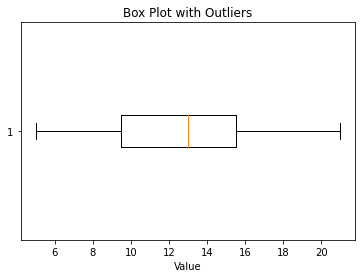

In [51]:
import matplotlib.pyplot as plt

data_sample = [15, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

plt.boxplot(data_sample, vert=False, showfliers=True)

plt.xlabel('Value')
plt.title('Box Plot with Outliers')

plt.show()

### Z-score 

z-score-any data point whose Z-score falls out of 3rd standard deviation is an outlier.The Z-score measures how many standard deviations a data point is away from the mean.
Steps:
1)loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.
2)Define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.

In [21]:
import numpy as np
sample= [15,110, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9,50]
outliers=[]
m=np.mean(sample)#mean
s=np.std(sample)#standard deviation
t=3 #threshold
for i in sample:
    z=(i-m)/s
    if (np.abs(z))>3:
        outliers.append(i)
outliers        

[110]

### Advantages & Disadvantages 

#Advantages
1)Standardization- Z-scores standardize the values, allowing you to compare the extent of deviation across different features, even if they have different units or scales.
2)Quantitative threshold- You can set a threshold value (e.g., if the Z-score is above a certain value, it's considered an outlier), which provides a quantitative criterion for determining outliers.
3)Statistical Foundation: Z-scores are based on the normal distribution and statistical theory, which can be beneficial when dealing with data that follows a roughly normal distribution.

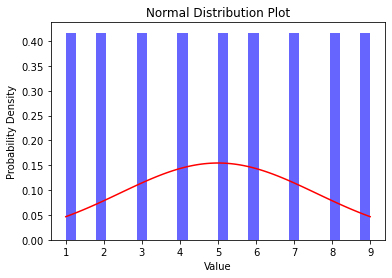

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data = [1,2,3,4,5,6,7,8,9]

plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

x_values = np.linspace(min(data), max(data), 100)
y_values = norm.pdf(x_values, np.mean(data), np.std(data))
plt.plot(x_values, y_values, 'r')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Plot')

plt.show()

#Disadvantages

1)Assumption of Normality: Z-score assumes that the data follows a normal distribution. If your data is not normally distributed, the Z-score may incorrectly identify points as outliers.

2)Impact of Sample Size: The behavior of the Z-score can be affected by the size of the dataset. With small sample sizes, outliers may have a larger impact on the mean and standard deviation.

3)Alternative Techniques Needed: Depending solely on Z-score might not be sufficient for complex datasets. Other techniques, like clustering-based or distance-based methods, might be needed to identify outliers that Z-score cannot capture effectively.

In [46]:
#Impact of sample size-Leads to falls positive due to small size
import numpy as np
from scipy.stats import zscore

# Sample data with a small sample size
data_small_sample = np.random.normal(loc=0, scale=1, size=10)

z_scores = zscore(data_small_sample)
outliers = np.where(np.abs(z_scores) > 2)[0]#threshold-hypertune

print("Indices of detected outliers:", outliers)

Indices of detected outliers: []


Alternative techniques are required when dealing with complex datasets where Z-score, a simple statistical method, falls short due to its inability to uncover intricate patterns, trends, and relationships that evade straightforward recognition.

## Inter Quartile range(IOR) 

The Interquartile Range (IQR) is a statistical measure that describes the spread or dispersion of a data set.
Data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

*STEPS:
Sort the dataset in ascending order
calculate the 1st and 3rd quartiles(Q1, Q3)
compute IQR=Q3-Q1
compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [84]:
sample= [15, 101, 18, 7, 13, 16, 11, 21, 15, 10, 9,5,8]
sample=sorted(sample)
q1 = np.percentile(sample, 25)
q3 = np.percentile(sample, 75)
IQR = q3-q1
LB=q1-(1.5*IQR)
UB=q3+(1.5*IQR)
for i in sample:
    if i<LB or i>UB:
        print(i)

101


## How to handle with outliers 

1.Mean/Median imputation.

2.Quantile based flooring and capping.

3.Triming or removing the outliers

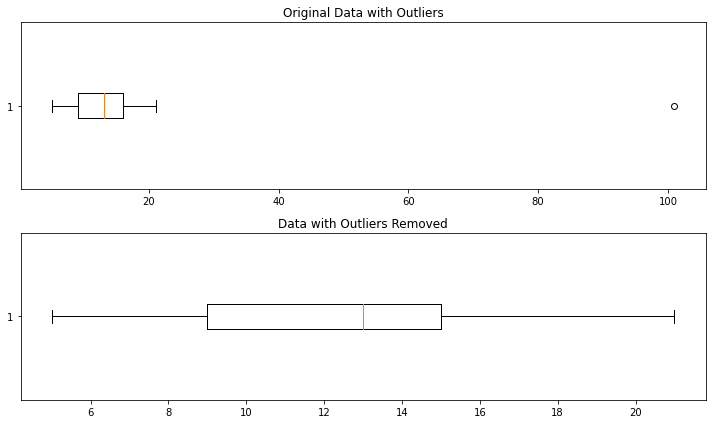

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
sample = [15, 101, 18, 7, 13, 16, 11, 21, 15, 10, 9, 5, 8]

# Calculate IQR
q1 = np.percentile(sample, 25)
q3 = np.percentile(sample, 75)
IQR = q3 - q1

# Calculate lower and upper bounds
LB = q1 - (1.5 * IQR)
UB = q3 + (1.5 * IQR)

# Replace outliers with median value
median_value = np.median(sample)
outlier_removed = [x if LB <= x <= UB else median_value for x in sample]

# Plot original and outlier-removed data
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.boxplot(sample, vert=False)
plt.title('Original Data with Outliers')

plt.subplot(2, 1, 2)
plt.boxplot(outlier_removed, vert=False)
plt.title('Data with Outliers Removed')

plt.tight_layout()
plt.show()